In [21]:
#Assignment_8 clustring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
#for agglomerativeClustering

#to Scale the features 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#for handling the missing values 
from sklearn.impute import SimpleImputer
#to remove outliers i am using RobustScaler
from sklearn.preprocessing import RobustScaler
#to calculate shilout score
from sklearn.metrics import silhouette_score

In [23]:
#loading data
data = pd.read_csv("D:/Assignments/Clustering/Clustering/EastWestAirlines_csv.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [27]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [29]:
data['ID#'].unique()

array([   1,    2,    3, ..., 4019, 4020, 4021], dtype=int64)

In [31]:
data.drop(columns='ID#',inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
#Model building 
#hierchical clustering
min_max_scaler = MinMaxScaler()
norm = min_max_scaler.fit_transform(data)
len(norm)

3999

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

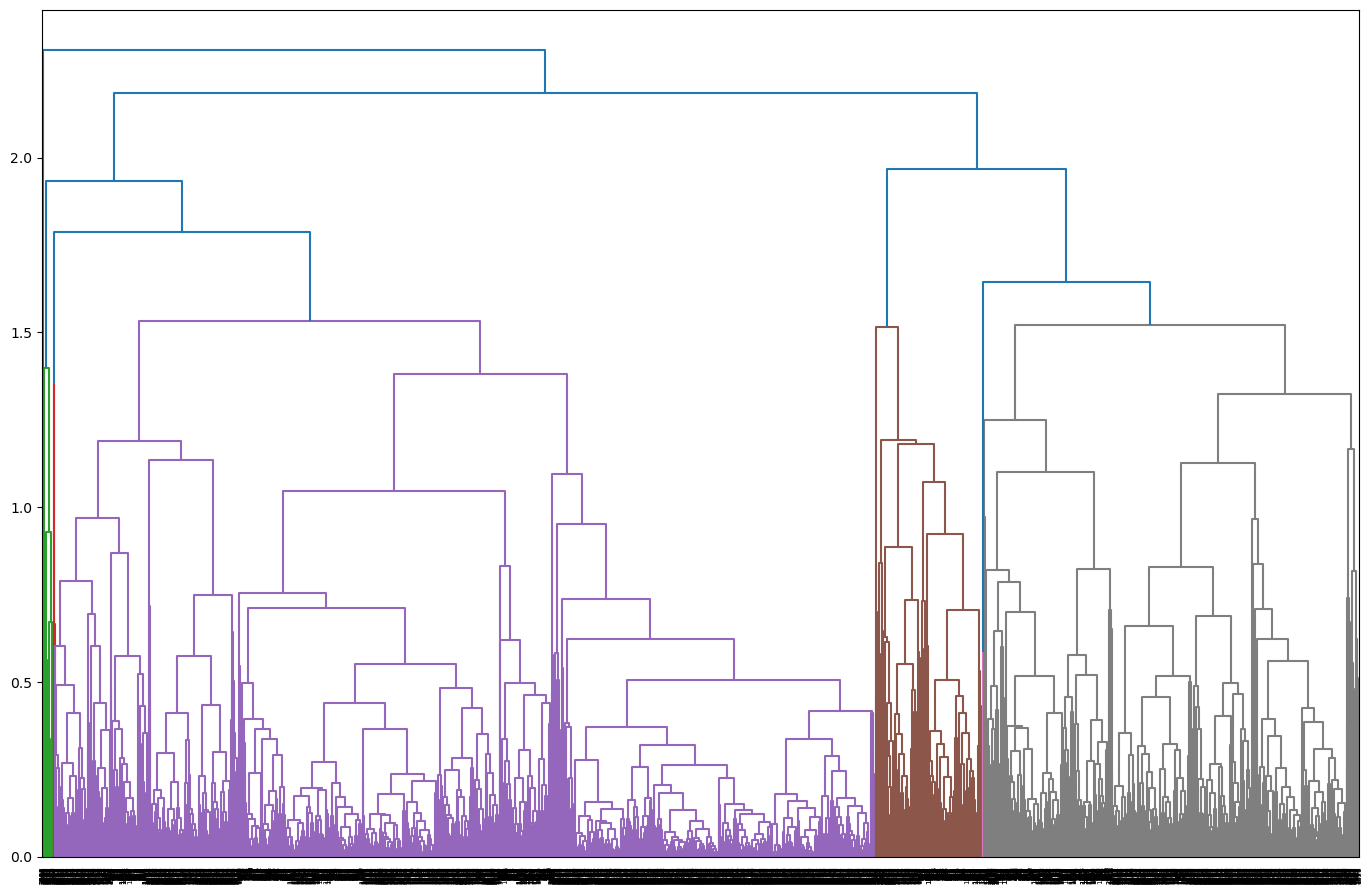

In [37]:
#Creating the dendo gram 
plt.figure(figsize=(17,11))
dendrogram=sch.dendrogram(sch.linkage(norm,method='complete'))
plt.show()

In [38]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, metric ='euclidean', linkage = 'complete')

In [39]:
y_hc = hc.fit_predict(norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [43]:
hc.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [47]:
data['h_clusterid'] = hc.labels_

In [49]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [51]:
data.h_clusterid.value_counts()

h_clusterid
0    2495
2    1144
1     325
4      31
3       4
Name: count, dtype: int64

In [53]:
data.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2485,23649,0,1,1,1,3250,16,0,0,3176,0,0
2487,169794,0,3,1,1,22824,19,767,2,3119,0,0
2488,23781,0,1,1,1,50,1,50,1,3085,0,0
2491,5970,0,1,1,1,1000,1,0,0,3091,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
940,44824,0,1,3,1,21107,19,2000,4,5916,1,4
3959,13942,0,1,2,1,5822,12,0,0,1458,0,4
3779,35850,0,1,3,1,17759,18,0,0,3439,0,4
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,4


In [55]:
data[data.h_clusterid==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [57]:
data.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


In [ ]:
#K-means

In [59]:
data1=data.drop(columns='h_clusterid')
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [61]:
scaler = StandardScaler().fit_transform(data1)
scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

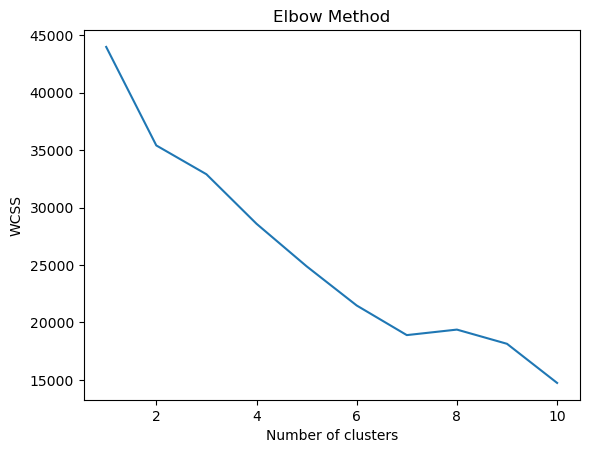

In [69]:
#within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
#within cluster sum of squares
wcss

[43988.999999999985,
 35409.516629861304,
 32901.45804218546,
 28589.20585898689,
 24884.115340434997,
 21470.514549809308,
 18891.750169018444,
 19371.700292851947,
 18134.25722153874,
 14727.658831288609]

In [71]:
clusters = KMeans(6, random_state=42)
clusters.fit(scaler)
clusters.labels_

array([2, 2, 2, ..., 0, 3, 3])

In [73]:
clusters.fit_predict(scaler)

array([2, 2, 2, ..., 0, 3, 3])

In [75]:
clusters.inertia_

25599.269402878563

In [79]:
silhouette_score(data1, clusters.labels_)

-0.03481925489833332

In [81]:
c2=KMeans(2, random_state=41)
c2.fit(scaler)

KMeans(n_clusters=2, random_state=41)

In [83]:
silhouette_score(data1, c2.labels_)

0.3446749880634653

In [85]:
data1['clusterid']=clusters.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [87]:
data1['clusterid'].value_counts()

clusterid
3    1185
2     980
0     819
1     800
4     128
5      87
Name: count, dtype: int64

In [91]:
data1.groupby('clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid,,,,,,,,,,,
0,56127.758242,194.483516,1.675214,1.019536,1.000000,10511.936508,10.586081,417.383394,1.249084,4253.031746,1.00000
1,107510.410000,136.801250,4.180000,1.001250,1.056250,48701.263750,19.910000,340.520000,1.022500,4817.865000,0.61125
2,59727.241837,71.454082,1.481633,1.020408,1.001020,6263.462245,8.532653,175.791837,0.517347,5647.725510,0.00000
3,34522.096203,93.091139,1.245570,1.011814,1.000000,4402.372996,6.589873,140.030380,0.422785,2103.353586,0.00000
4,132067.828125,678.835938,2.132812,1.046875,1.000000,30273.203125,28.906250,5995.664062,17.382812,4427.500000,0.78125
5,528835.448276,463.931034,3.666667,1.011494,1.034483,66229.632184,22.149425,1377.620690,4.816092,6191.137931,0.83908


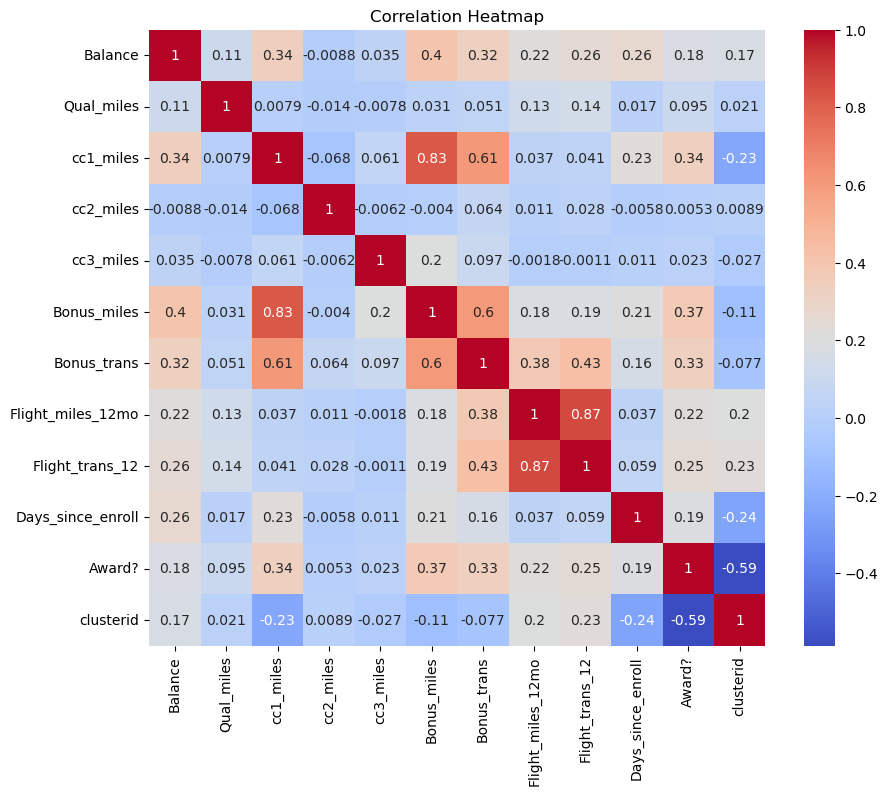

In [97]:
#heat map
data2 = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data2, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


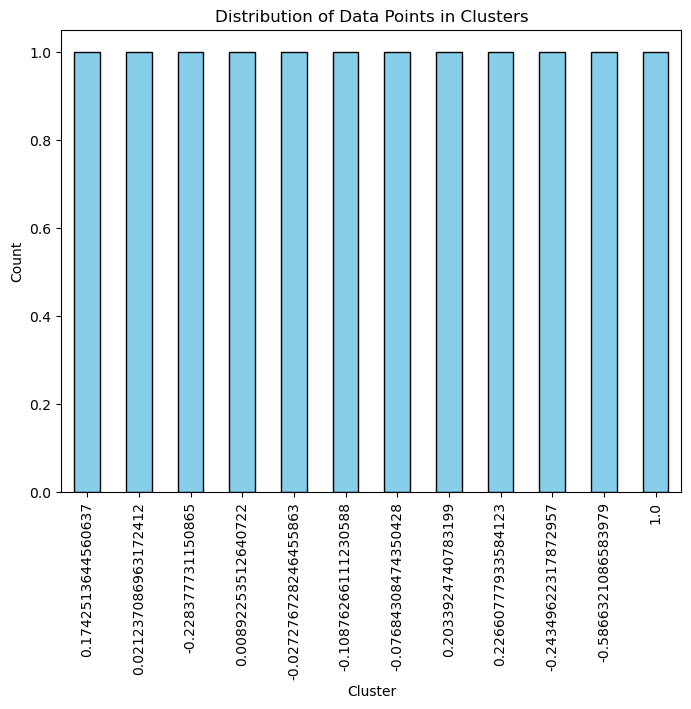

In [112]:
plt.figure(figsize=(8, 6))
data2["clusterid"].value_counts().plot(kind="bar", color="skyblue",edgecolor = 'k')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Data Points in Clusters")
plt.show()


In [ ]:
#DBSCAN

In [140]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=7)
dbscan.fit(scaler)
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [142]:
data3=data.drop(columns='h_clusterid')
data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [144]:
data3['clusterId']=dbscan.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [146]:
data3['clusterId'].value_counts()

clusterId
 0    2299
 1    1072
-1     604
 2      11
 4       8
 3       5
Name: count, dtype: int64

In [150]:
data3.groupby('clusterId').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterId,,,,,,,,,,,
-1,177887.369205,896.723510,2.690397,1.077815,1.081126,38686.490066,21.649007,2103.266556,6.089404,4741.235099,0.677152
0,52733.796433,3.679426,1.656807,1.000000,1.000000,9001.937364,8.428882,113.070465,0.373206,3791.968247,0.000000
1,60530.977612,6.554104,2.591418,1.000000,1.000000,22723.841418,12.793843,268.355410,0.840485,4503.971082,1.000000
2,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.000000
3,51030.000000,0.000000,1.000000,1.000000,1.000000,4737.600000,11.400000,4242.800000,10.400000,2871.600000,0.000000
4,24545.375000,2401.000000,1.000000,1.000000,1.000000,2427.750000,5.000000,37.500000,0.250000,2042.625000,0.000000


In [160]:
labels = dbscan.labels_
non_noise_indices = labels != -1
sil_score = silhouette_score(scaler[non_noise_indices],labels[non_noise_indices])
print('Silhouette score for DBSCAN')
sil_score

Silhouette score for DBSCAN


0.297321392696696